<a href="https://colab.research.google.com/github/msommerfe/CAS_Applied_Data_Science/blob/main/CAS_Final_Project/OCR_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import cv2
import os

In [3]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
  data_dir = 'drive/My Drive/colab/keras-ocr'
  os.makedirs(data_dir, exist_ok=True)
except ImportError:
  data_dir = '.'

Mounted at /content/drive


In [ ]:
### Converting CHars to nums is better for ML

alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' 0123456789"
max_str_len = 24 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 64 # max length of predicted labels
batch_size = 128

def label_to_num(label):
    label_num = []
    for ch in label:

            label_num.append(alphabets.find(ch) if alphabets.find(ch)!=-1 else alphabets.find('-'))

    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret



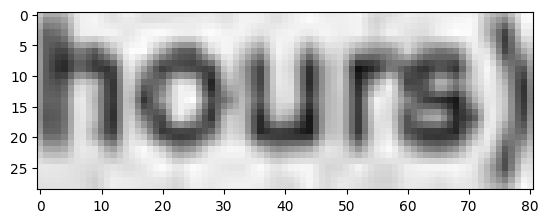

array([[195, 169, 170, ..., 222, 248, 250],
       [179, 143, 146, ..., 213, 248, 249],
       [166, 123, 127, ..., 199, 241, 241],
       ...,
       [229, 230, 229, ..., 193, 232, 228],
       [227, 228, 228, ..., 209, 242, 235],
       [225, 225, 226, ..., 222, 248, 239]], dtype=uint8)

In [112]:
ImgFolder = '/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/dataset/v011_words_small/'
imgPath = os.path.join(ImgFolder, "10.png")


plt.imshow(cv2.imread(imgPath))
plt.show()
cv2.imread(imgPath,cv2.IMREAD_GRAYSCALE)

(23, 69)


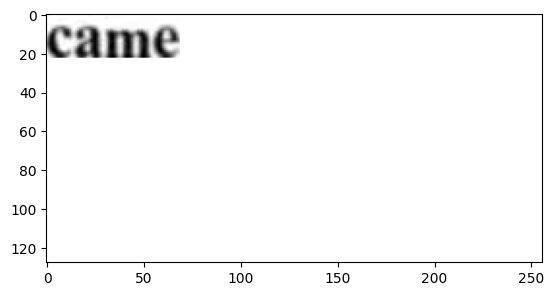

In [16]:
#Scales the width if the image to max_width. Only if the high after scaling to max_width is higher than max_hight, only the hight will be scaled down to max_hight
# Expacts gray scale Images
def preprocess(img):
    max_hight = 128
    max_width = 256

    (h, w) = img.shape


    #Scale all Images down that image width is max_width
    scaleFactor = max_width / w
    if scaleFactor < 1:
      img = cv2.resize(img, None, fx = scaleFactor, fy = scaleFactor)
      (h, w) = img.shape

    #creates blank white image with size max_hight x max_width
    final_img = np.ones([max_hight, max_width])*255 # blank white image

    # if hight is still greater than max_hight, scale only hight down to max_hight
    if h > max_hight:
       img = cv2.resize(img, None, fx = 1, fy = (max_hight/h))


    # fills the blank image with resized imput image
    final_img[:h, :w] = img
    return final_img

image = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
print(image.shape)

plt.imshow(preprocess(image),cmap='gray')

In [ ]:
import json
import numpy as np

ImgFolder = '/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/dataset/v011_words_small/'

#Reading the json {Image_filename, "test on Image"}
with open('/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/v011_labels_small.json') as f:
    data = list(json.load(f).items())
keyVal = np.array(data)
y_all = keyVal[:,1]
x_all_img_path = keyVal[:,0]


i = 0
#Reading all Images an put into a np array
x_all=[]
for imgName in x_all_img_path:
  imgPath = os.path.join(ImgFolder, imgName)

  entry = cv2.imread(imgPath,cv2.IMREAD_GRAYSCALE)
  x_all.append(preprocess(entry))

  i=i+1
  print(i)
  if i == 1000:
    break

x_all = np.array(x_all)
print(x_all.shape)


In [ ]:
import json
import numpy as np
from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor

ImgFolder = '/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/dataset/v011_words_small/'

#Reading the json {Image_filename, "test on Image"}
with open('/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/v011_labels_small.json') as f:
    data = list(json.load(f).items())
keyVal = np.array(data)
y_all = keyVal[:,1]
x_all_img_path = keyVal[:,0]


i = 0
#Reading all Images an put into a np array
x_all=[]

def load_image(imgName):
  imgPath = ImgFolder+imgName
  entry = cv2.imread(imgPath,cv2.IMREAD_GRAYSCALE)
  #print(i)
  #i=i+1
  print(imgName)
  return preprocess(entry)




#with Pool() as pool:
#    images = pool.map(load_image, x_all_img_path)

images = []
with ThreadPoolExecutor() as executor:
    results = executor.map(lambda path: load_image(path), x_all_img_path)
    for result in results:
        if result is not None:
            images.append(result)


print(images.shape)
print(type(images))

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
3797.jpeg
3798.png
3799.png
3800.png
3801.png
3802.png
3803.png
3804.jpeg
3805.png
3807.jpeg
3806.png
3808.jpeg
3810.png
3809.png
3811.jpeg
3812.png
3814.png
3813.png
3816.jpeg
3815.png
3817.png
3818.jpeg
3819.png
3820.png
3821.png
3822.jpeg
3823.jpeg
3824.jpeg
3825.jpeg
3826.jpeg
3827.jpeg
3828.png
3829.png
3830.png
3831.jpeg
3832.png
3833.png
3834.png
3835.png
3836.png
3838.png
3837.png
3839.jpeg
3840.jpeg
3841.png
3842.png
3843.jpeg
3844.jpeg
3845.jpeg
3846.png
3847.png
3848.png
3849.png
3850.png
3851.jpeg
3852.png
3853.png
3854.png
3855.png
3856.jpeg
3858.jpeg
3857.png
3859.png
3860.jpeg
3861.jpeg
3862.jpeg
3863.png
3864.jpeg
3865.png
3866.png
3867.png
3868.png
3869.png
3870.png
3871.jpeg
3872.jpeg
3873.png
3874.jpeg
3875.jpeg
3876.png
3877.jpeg
3878.png
3879.png
3880.jpeg
3881.jpeg
3882.jpeg
3883.jpeg
3884.jpeg
3885.png
3886.jpeg
3887.png
3888.jpeg
3889.jpeg
3890.png
3891.jpeg
3892.jpeg
3893.jpeg
3894.jpeg
3895.png